Installing Libraries

In [1]:
pip install miceforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 2.6 MB 10.2 MB/s 
     |████████████████████████████████| 2.0 MB 39.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [2]:
pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 29.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9359b230b11611a01868328dcae40ee688c3f32fdef88a42c6a95fae5fde0cda
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=a04023461500df31eb2c8c22ff8c415ddb47a5dc0ce2cdaa37d06058ae91ef31
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [4]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [5]:
pip install geopy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Making Imports

In [6]:
from numpy import mean
import pandas as pd
import numpy as np
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import math
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from numpy import mean
import pandas as pd
from lazypredict.Supervised import LazyClassifier
import numpy as np
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

Reading in the data

In [10]:
df=pd.read_csv('/content/trips_data.csv')

Data Imputation

In [11]:
dfnum=df[['Begin Trip Lat','Begin Trip Lng','Dropoff Lat','Dropoff Lng','Distance (miles)','Fare Amount']]

In [ ]:
res=[]

for i in range(len(df)):
  if df['Trip or Order Status'][i]=="COMPLETED":
    res.append(1)
  else:
    res.append(0)


In [12]:
pd.DataFrame(res).to_csv('y.csv')

NameError: ignored

In [13]:
y=pd.read_csv('/content/y.csv')

Data Imputation

In [14]:
mitrain=dfnum

Mice Forest

In [15]:
import miceforest as mf

mi_iternations=4
test_error = []

kernel = mf.ImputationKernel(
      mitrain, 
      datasets=mi_iternations, 
      save_all_iterations=True, 
      random_state=0
    )
kernel.mice(5)

In [16]:
dfnumimputed=kernel.complete_data().copy()

Dummies are used for classic econometric concerns

These pertain to interpreting rows which might be 0 for everything.

If one hot encoding is used rows that are all 0 will not have any meaning

Dummy variables do not have this issue

In [17]:
dfcat=df[['City','Product Type']]

In [18]:
dfcatencoding=pd.get_dummies(dfcat)

Extracting full addresses from location

In [19]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")


Extracting features from addresses

In [20]:
addresslist=[]

for i in range(len(dfnumimputed)):

  lat=str(dfnumimputed['Begin Trip Lat'][i])
  lng=str(dfnumimputed['Begin Trip Lng'][i])
  try:
    location = geolocator.reverse(lat+","+lng)
  except:
    b5=0
  try:
    address = location.raw['address']
  except:
    b7=1
    
  addresslist.append(address)


q=pd.DataFrame(addresslist)

In [21]:
q.head()

,amenity,road,suburb,city,municipality,county,state_district,state,ISO3166-2-lvl4,region,...,office,railway,neighbourhood,quarter,place,leisure,town,man_made,club,tourism
0,Hospital Israelita Albert Einstein,Rua Ruggero Fasano,Morumbi,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Alameda Franca,Jardim Paulista,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Viaduto João Julião da Costa Aguiar,Campo Belo,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Alameda Franca,Jardim Paulista,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Avenida República do Líbano,Moema,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
addresslist2=[]

for i in range(len(dfnumimputed)):

  lat2=str(dfnumimputed['Dropoff Lat'][i])
  lng2=str(dfnumimputed['Dropoff Lng'][i])
  try:
    location2 = geolocator.reverse(lat2+","+lng2)
  except:
    b5=0
  try:
    address2 = location2.raw['address']
  except:
    b7=1
  addresslist2.append(address2)


q2=pd.DataFrame(addresslist2)

In [23]:
q2.head()

,house_number,road,suburb,city,municipality,county,state_district,state,ISO3166-2-lvl4,region,...,shop,place,neighbourhood,office,leisure,quarter,historic,tourism,railway,town
0,1485,Alameda Franca,Jardim Paulista,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Rua Ruggero Fasano,Morumbi,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1498,Alameda Franca,Jardim Paulista,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Corredor de Táxis/Ônibus/Acessibilidade de Des...,Aeroporto Internacional Governador André Franc...,Guarulhos,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1498,Alameda Franca,Jardim Paulista,São Paulo,Região Imediata de São Paulo,Região Metropolitana de São Paulo,Região Geográfica Intermediária de São Paulo,São Paulo,BR-SP,Região Sudeste,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
dfcatencoding2=pd.get_dummies(q)

In [33]:
dfcatencoding3=pd.get_dummies(q2)

In [34]:
s1=q[q.columns[0:]].agg(lambda x: ' '.join(x.dropna().astype(str)),axis=1)


Tfidf Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

tfi1=vectorizer.fit_transform(s1)


In [36]:
dftfienc1=pd.DataFrame(tfi1.toarray())

In [37]:
s2=q2[q2.columns[0:]].apply(lambda x: ' '.join(x.dropna().astype(str)),axis=1)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer2 = TfidfVectorizer()

tfi2=vectorizer2.fit_transform(s2)


In [39]:
dftfienc2=pd.DataFrame(tfi2.toarray())

In [40]:
dataframes=[dfnumimputed,dfcatencoding,dfcatencoding2,dfcatencoding3,dftfienc1,dftfienc2]
dfencoded=pd.concat(dataframes,axis=1)

In [41]:
X=dfencoded

In [43]:
X.head()

,Begin Trip Lat,Begin Trip Lng,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,City,Product Type_Black,Product Type_Juntos,Product Type_POOL,...,834,835,836,837,838,839,840,841,842,843
0,-23.60,-46.72,-23.56,-46.67,4.84,29.63,458,1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-23.56,-46.67,-23.60,-46.72,5.31,20.86,458,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-23.63,-46.66,-23.56,-46.67,5.90,34.23,458,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-23.56,-46.67,-23.43,-46.48,19.74,58.77,458,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18
4,-23.58,-46.66,-23.56,-46.67,2.54,12.63,458,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Synthetic Minority Oversampling for resolving class imbalance

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X.to_numpy(), y)

Test train split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.50)

Fitting 29 classification models

In [46]:
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric = None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:01<00:33,  1.20s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9933774834437086, 'Balanced Accuracy': 0.9929245283018868, 'ROC AUC': 0.9929245283018867, 'F1 Score': 0.9933743697889866, 'Time taken': 1.194037914276123}


  7%|▋         | 2/29 [00:01<00:19,  1.37it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9955849889624724, 'Balanced Accuracy': 0.9952830188679245, 'ROC AUC': 0.9952830188679246, 'F1 Score': 0.9955836487746402, 'Time taken': 0.4056973457336426}


 10%|█         | 3/29 [00:01<00:12,  2.00it/s]

{'Model': 'BernoulliNB', 'Accuracy': 0.9271523178807947, 'Balanced Accuracy': 0.9241564237062554, 'ROC AUC': 0.9241564237062555, 'F1 Score': 0.9268248883640617, 'Time taken': 0.21559453010559082}


 17%|█▋        | 5/29 [00:14<01:21,  3.38s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9580573951434879, 'Balanced Accuracy': 0.9600133093243561, 'ROC AUC': 0.960013309324356, 'F1 Score': 0.958100358014232, 'Time taken': 12.400191307067871}


 24%|██▍       | 7/29 [00:14<00:35,  1.59s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9933774834437086, 'Balanced Accuracy': 0.9929245283018868, 'ROC AUC': 0.9929245283018867, 'F1 Score': 0.9933743697889866, 'Time taken': 0.1749401092529297}
{'Model': 'DummyClassifier', 'Accuracy': 0.46799116997792495, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.29838835499344385, 'Time taken': 0.15073895454406738}


 28%|██▊       | 8/29 [00:14<00:23,  1.14s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9403973509933775, 'Balanced Accuracy': 0.9411453847960543, 'ROC AUC': 0.9411453847960541, 'F1 Score': 0.9404421858105567, 'Time taken': 0.1646273136138916}


 34%|███▍      | 10/29 [00:15<00:13,  1.40it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9845474613686535, 'Balanced Accuracy': 0.9851933766538792, 'ROC AUC': 0.9851933766538793, 'F1 Score': 0.9845565229796143, 'Time taken': 0.5402703285217285}
{'Model': 'GaussianNB', 'Accuracy': 0.9072847682119205, 'Balanced Accuracy': 0.9122954670007046, 'ROC AUC': 0.9122954670007047, 'F1 Score': 0.9071301885871423, 'Time taken': 0.18478178977966309}


 38%|███▊      | 11/29 [00:15<00:10,  1.76it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8322295805739515, 'Balanced Accuracy': 0.8321067877554216, 'ROC AUC': 0.8321067877554218, 'F1 Score': 0.8323115862143857, 'Time taken': 0.22875165939331055}


 41%|████▏     | 12/29 [00:16<00:08,  2.02it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.6004415011037527, 'Balanced Accuracy': 0.6244813278008299, 'ROC AUC': 0.6244813278008299, 'F1 Score': 0.540077132076908, 'Time taken': 0.32257819175720215}


 45%|████▍     | 13/29 [00:16<00:07,  2.25it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.6004415011037527, 'Balanced Accuracy': 0.6244813278008299, 'ROC AUC': 0.6244813278008299, 'F1 Score': 0.540077132076908, 'Time taken': 0.3210916519165039}


 48%|████▊     | 14/29 [00:17<00:08,  1.79it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8233995584988962, 'Balanced Accuracy': 0.8340248962655601, 'ROC AUC': 0.8340248962655601, 'F1 Score': 0.8198432833205987, 'Time taken': 0.817101240158081}


 52%|█████▏    | 15/29 [00:20<00:17,  1.24s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.9492273730684326, 'Balanced Accuracy': 0.9517145541376341, 'ROC AUC': 0.9517145541376341, 'F1 Score': 0.9492744056175506, 'Time taken': 2.8263745307922363}


 55%|█████▌    | 16/29 [00:20<00:12,  1.04it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.9470198675496688, 'Balanced Accuracy': 0.950207468879668, 'ROC AUC': 0.950207468879668, 'F1 Score': 0.9470508524992461, 'Time taken': 0.3084409236907959}


 59%|█████▊    | 17/29 [00:20<00:08,  1.35it/s]

{'Model': 'NearestCentroid', 'Accuracy': 0.9006622516556292, 'Balanced Accuracy': 0.902381977609019, 'ROC AUC': 0.902381977609019, 'F1 Score': 0.900764005823181, 'Time taken': 0.21340179443359375}


 62%|██████▏   | 18/29 [00:21<00:08,  1.28it/s]

{'Model': 'NuSVC', 'Accuracy': 0.8631346578366446, 'Balanced Accuracy': 0.8620038362170203, 'ROC AUC': 0.8620038362170203, 'F1 Score': 0.8630461499728117, 'Time taken': 0.8844747543334961}


 66%|██████▌   | 19/29 [00:21<00:06,  1.62it/s]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9514348785871964, 'Balanced Accuracy': 0.9537892429343146, 'ROC AUC': 0.9537892429343146, 'F1 Score': 0.951481765260428, 'Time taken': 0.22003769874572754}


 69%|██████▉   | 20/29 [00:22<00:04,  2.00it/s]

{'Model': 'Perceptron', 'Accuracy': 0.9514348785871964, 'Balanced Accuracy': 0.954356846473029, 'ROC AUC': 0.954356846473029, 'F1 Score': 0.951471333201632, 'Time taken': 0.21704936027526855}


 72%|███████▏  | 21/29 [00:22<00:04,  1.89it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9977924944812362, 'Balanced Accuracy': 0.9979253112033195, 'ROC AUC': 0.9979253112033195, 'F1 Score': 0.997792796842271, 'Time taken': 0.5898880958557129}


 76%|███████▌  | 22/29 [00:23<00:03,  1.93it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9889624724061811, 'Balanced Accuracy': 0.9887751507085258, 'ROC AUC': 0.9887751507085257, 'F1 Score': 0.9889608516952589, 'Time taken': 0.4923696517944336}


 79%|███████▉  | 23/29 [00:23<00:02,  2.30it/s]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9205298013245033, 'Balanced Accuracy': 0.9253112033195021, 'ROC AUC': 0.9253112033195021, 'F1 Score': 0.9204321873156018, 'Time taken': 0.23824453353881836}


 83%|████████▎ | 24/29 [00:23<00:02,  2.48it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9381898454746137, 'Balanced Accuracy': 0.941908713692946, 'ROC AUC': 0.941908713692946, 'F1 Score': 0.938198279279956, 'Time taken': 0.32054829597473145}


 86%|████████▌ | 25/29 [00:23<00:01,  2.84it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.9646799116997793, 'Balanced Accuracy': 0.9659535739450402, 'ROC AUC': 0.9659535739450402, 'F1 Score': 0.9647126716817026, 'Time taken': 0.22319316864013672}


 90%|████████▉ | 26/29 [00:24<00:01,  1.95it/s]

{'Model': 'SVC', 'Accuracy': 0.8631346578366446, 'Balanced Accuracy': 0.8620038362170203, 'ROC AUC': 0.8620038362170203, 'F1 Score': 0.8630461499728117, 'Time taken': 0.8803467750549316}


 97%|█████████▋| 28/29 [00:27<00:00,  1.06it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9955849889624724, 'Balanced Accuracy': 0.9952830188679245, 'ROC AUC': 0.9952830188679246, 'F1 Score': 0.9955836487746402, 'Time taken': 2.8898379802703857}


100%|██████████| 29/29 [00:28<00:00,  1.03it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9955849889624724, 'Balanced Accuracy': 0.9952830188679245, 'ROC AUC': 0.9952830188679246, 'F1 Score': 0.9955836487746402, 'Time taken': 0.4314281940460205}


In [47]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.59
LGBMClassifier,1.00,1.00,1.00,1.00,0.43
BaggingClassifier,1.00,1.00,1.00,1.00,0.41
XGBClassifier,1.00,1.00,1.00,1.00,2.89
AdaBoostClassifier,0.99,0.99,0.99,0.99,1.19
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.17
RandomForestClassifier,0.99,0.99,0.99,0.99,0.49
ExtraTreesClassifier,0.98,0.99,0.99,0.98,0.54
SGDClassifier,0.96,0.97,0.97,0.96,0.22


Results

In [48]:
models.to_csv('results.csv')

In [49]:
results=pd.read_csv('/content/results.csv')

Accuracy

In [50]:
import plotly.express as px
figaccuracy = px.bar(x=results['Model'], y=results['Accuracy'],labels={"x":"Model","y":"Accuracy"},title="Accuracy of all models")
figaccuracy.show()

Balanced Accuracy

In [51]:
import plotly.express as px
figbalancedaccuracy = px.bar(x=results['Model'], y=results['Balanced Accuracy'],labels={"x":"Model","y":"Balanced Accuracy"},title="Balanced Accuracy of all models")
figbalancedaccuracy.show()

F1 Score

In [52]:
import plotly.express as px
fig = px.bar(x=results['Model'], y=results['F1 Score'],labels={"x":"Model","y":"F1 score"},title="F1 scores of all models")
fig.show()

AUC-ROC

In [53]:
import plotly.express as px
fig = px.bar(x=results['Model'], y=results['ROC AUC'],labels={"x":"Model","y":"AUC-ROC"},title="AUC-ROC of all models")
fig.show()

Light gradient boosting machine

Hyper-parameter optimization

In [54]:

from lightgbm import LGBMClassifier
import lightgbm
import lightgbm as lgb

model2=lgb.LGBMClassifier(random_state = 0)
model2.fit(X_train,y_train)

parameter_grid2 = {'n_estimators': [5,10,20,30],'max_depth':[5,10],'learning_rate':[0.001,0.1],'num_leaves':[4,10],'lambda_l1':[0.1,1],'lambda_l2':[0.1,2]}

finalgrid_LGB2 = GridSearchCV(estimator=model2, param_grid=parameter_grid2, cv = 4, verbose = 2, n_jobs=-1)
finalgrid_LGB2.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,finalgrid_LGB2.predict(X_test))

Fitting 4 folds for each of 128 candidates, totalling 512 fits


0.006622516556291391

In [55]:
finalgrid_LGB2.best_params_

{'lambda_l1': 0.1,
 'lambda_l2': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 30,
 'num_leaves': 4}

Performance Metrics

In [56]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, finalgrid_LGB2.predict(X_test),average='macro')

(0.9938524590163935, 0.9929245283018868, 0.9933442711266742, None)

Confusion Matrix

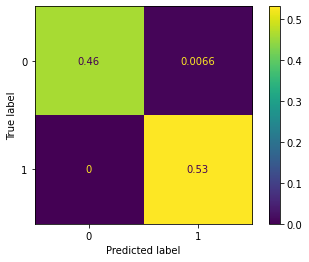

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    finalgrid_LGB2, X_test, y_test,normalize='all')


Output as probability

In [58]:
probabilities=pd.DataFrame(finalgrid_LGB2.predict_proba(X))

In [63]:
y['target']

0      1
1      1
2      1
3      1
4      1
      ..
549    1
550    1
551    1
552    0
553    0
Name: target, Length: 554, dtype: int64

In [64]:
import plotly.express as px
fig = px.scatter(y=probabilities.iloc[:,1],color=y['target'],color_continuous_scale=px.colors.sequential.Turbo,labels={"x":"Index","y":"Probability"},title="Probability Plot")
fig.show()

Permutation Feature Importance

In [66]:
from sklearn.inspection import permutation_importance
r = permutation_importance(finalgrid_LGB2, X,y,
                           n_repeats=30,
                           random_state=0)
r['importances_mean']

Partial Dependance

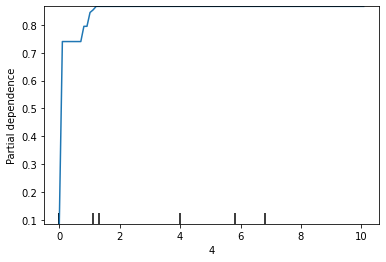

In [74]:
from sklearn.inspection import PartialDependenceDisplay

features = [4]

PartialDependenceDisplay.from_estimator(finalgrid_LGB2, X_test, features)

SHAP

In [75]:
import shap
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import time

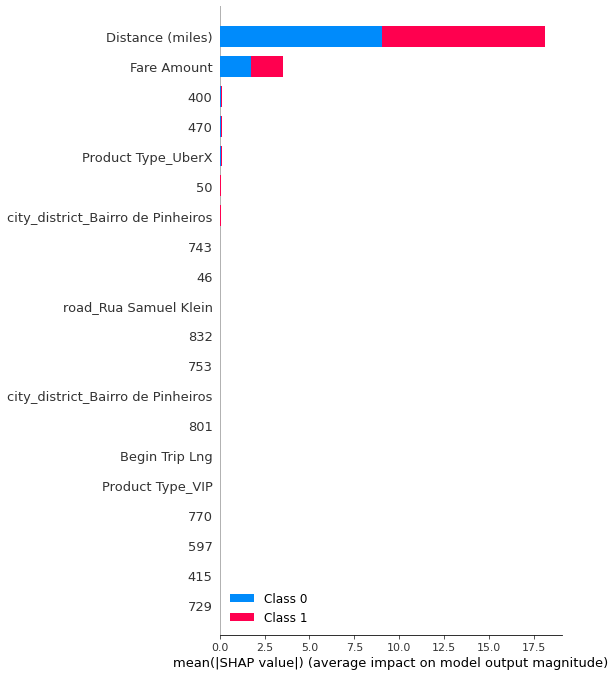

In [76]:
import shap

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

Dimensionality Reduction

In [77]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pcacomponents=pca.fit_transform(X)

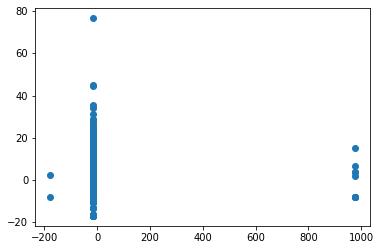

In [78]:
plot = plt.scatter(pcacomponents[:,0],pcacomponents[:,1])

In [80]:
import plotly.express as px
fig20 = px.scatter(x=pcacomponents[:,0],y=pcacomponents[:,1],color=y['target'],color_continuous_scale=px.colors.sequential.Plotly3,labels={"x":"PCA 1","y":"PCA 2"},title="PCA plot")
fig20.show()

ICA

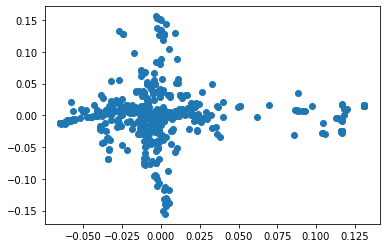

In [81]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

transformer = FastICA(n_components=10, random_state=0)
X_transformedica = transformer.fit_transform(X)

plot = plt.scatter(X_transformedica[:,0], X_transformedica[:,1])

In [82]:
import plotly.express as px
fig20 = px.scatter(x=X_transformedica[:,0],y=X_transformedica[:,1],color=y['target'],labels={"x":"ICA 1","y":"ICA 2"},title="ICA plot",color_continuous_scale=px.colors.sequential.Plotly3)
fig20.show()

In [83]:
#Umap plot
import umap
n_neighbors=50
min_dist=0.01
n_components=2
metric='euclidean'
fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
uvalues = fit.fit_transform(X)

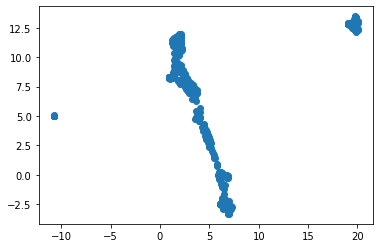

In [84]:
ploot = plt.scatter(uvalues[:,0], uvalues[:,1])


In [85]:
import plotly.express as px
fig20 = px.scatter(x=uvalues[:,0],y=uvalues[:,1],color=y['target'],labels={"x":"Umap 1","y":"Umap 2"},title="Umap plot",color_continuous_scale=px.colors.sequential.RdBu)


fig20.show()

Standard Scaler

In [86]:
xt = X.to_numpy()

# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(xt)
xt = scaler.transform(xt)

Deep learning

Neural netowork autoencoder architecture

In [114]:
input_dim = 3125

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
                Dense(128, activation='relu'),

            Dense(45, activation='relu'),

        Dense(30, activation='relu'),
    Dense(16, activation='relu'),

    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
        Dense(32, activation='relu'),
                Dense(16, activation='relu'),


    Dense(8, activation='relu'),
    Dense(4, activation='relu'),

    Dense(input_dim, activation=None)
])

In [115]:
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               1600512   
                                                                 
 dense_29 (Dense)            (None, 128)               65664     
                                                                 
 dense_30 (Dense)            (None, 45)                5805      
                                                                 
 dense_31 (Dense)            (None, 30)                1380      
                                                                 
 dense_32 (Dense)            (None, 16)                496       
                                                                 
 dense_33 (Dense)            (None, 8)                 136       
                                                                 
 dense_34 (Dense)            (None, 4)                

In [116]:
decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                192       
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 4)                 36        
                                                                 
 dense_41 (Dense)            (None, 3125)              15625     
                                                                 
Total params: 18,597
Trainable params: 18,597
Non-trai

In [117]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

In [118]:
encoded_x_train = encoder(X_train)

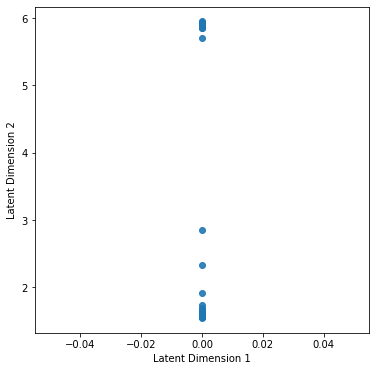

In [119]:
plt.figure(figsize=(6,6))
plt.scatter(encoded_x_train[:, 0], encoded_x_train[:, 1], alpha=0.9)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2');

In [120]:
import plotly.express as px
fig20 = px.scatter(x=encoded_x_train[:,0],y=encoded_x_train[:,1],color=y_train['target'],labels={"x":"Autoencoder 1","y":"Autoencoder 2"},title="Deep learning plot",color_continuous_scale=px.colors.sequential.Plasma)

fig20.show()

Case B

Using extracted features

In [121]:
import lightgbm as lgb

model3=lgb.LGBMClassifier(random_state = 0)
model3.fit(X_res[:,6:],y_res)

parameter_grid3 = {'n_estimators': [5,10,20,30],'max_depth':[5,10],'learning_rate':[0.001,0.1],'num_leaves':[4,10],'lambda_l1':[0.1,1],'lambda_l2':[0.1,2]}

finalgrid_LGB3=GridSearchCV(estimator=model3, param_grid=parameter_grid3, cv = 4, verbose = 2, n_jobs=-1)
finalgrid_LGB3.fit(X_res[:,6:],y_res)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_res,finalgrid_LGB3.predict(X_res[:,6:]))

Fitting 4 folds for each of 128 candidates, totalling 512 fits


0.02869757174392936

In [123]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_res, finalgrid_LGB3.predict(X_res[:,6:]),average='macro')

(0.9717530107846819, 0.9713024282560707, 0.9712955741860012, None)

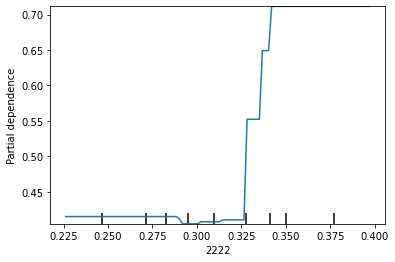

In [127]:
from sklearn.inspection import PartialDependenceDisplay

features = [2222]

PartialDependenceDisplay.from_estimator(finalgrid_LGB3, X_res[:,6:], features)

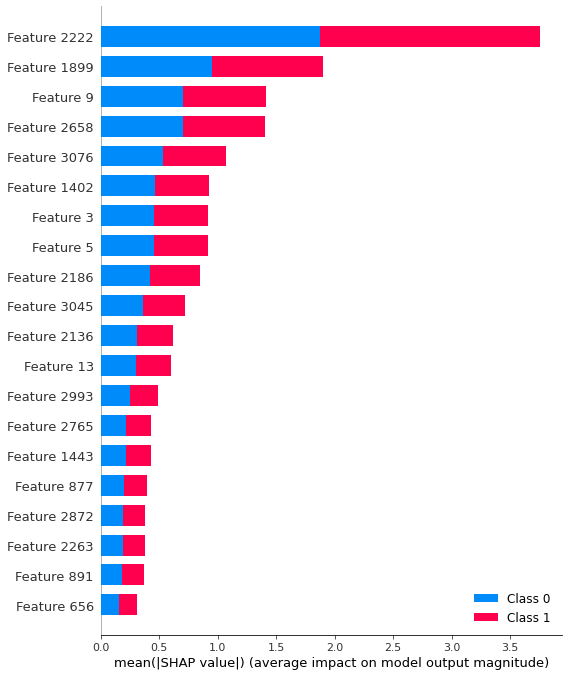

In [126]:
import shap

explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_res[:,6:])
shap.summary_plot(shap_values, X_res[:,6:])

In [128]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_res[:,6:],y_res, test_size=0.50)

clf6 = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric = None)
models6, predictions6 = clf.fit(X_train6, X_test6, y_train6, y_test6)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  3%|▎         | 1/29 [00:02<01:18,  2.79s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9006622516556292, 'Balanced Accuracy': 0.902063969382176, 'ROC AUC': 0.9020639693821761, 'F1 Score': 0.9006787107255528, 'Time taken': 2.7908668518066406}


  7%|▋         | 2/29 [00:03<00:41,  1.54s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9072847682119205, 'Balanced Accuracy': 0.9089764117784894, 'ROC AUC': 0.9089764117784895, 'F1 Score': 0.9072757319919108, 'Time taken': 0.6551756858825684}


 10%|█         | 3/29 [00:03<00:24,  1.06it/s]

{'Model': 'BernoulliNB', 'Accuracy': 0.8940397350993378, 'Balanced Accuracy': 0.894409513395298, 'ROC AUC': 0.8944095133952981, 'F1 Score': 0.8940800438228174, 'Time taken': 0.231306791305542}


 17%|█▋        | 5/29 [00:13<01:06,  2.79s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9558498896247241, 'Balanced Accuracy': 0.9576271186440678, 'ROC AUC': 0.9576271186440678, 'F1 Score': 0.9558455866628147, 'Time taken': 9.353574991226196}


 21%|██        | 6/29 [00:13<00:44,  1.93s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9227373068432672, 'Balanced Accuracy': 0.9239924236507069, 'ROC AUC': 0.9239924236507069, 'F1 Score': 0.922759899044704, 'Time taken': 0.2594032287597656}


 24%|██▍       | 7/29 [00:13<00:30,  1.39s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.47902869757174393, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.31029620111363715, 'Time taken': 0.2545328140258789}


 28%|██▊       | 8/29 [00:14<00:21,  1.03s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8896247240618101, 'Balanced Accuracy': 0.8907287354526283, 'ROC AUC': 0.8907287354526283, 'F1 Score': 0.8896623793824768, 'Time taken': 0.2532846927642822}


 31%|███       | 9/29 [00:14<00:20,  1.00s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9293598233995585, 'Balanced Accuracy': 0.9318323830352262, 'ROC AUC': 0.9318323830352261, 'F1 Score': 0.9292730418558233, 'Time taken': 0.952251672744751}


 34%|███▍      | 10/29 [00:15<00:14,  1.27it/s]

{'Model': 'GaussianNB', 'Accuracy': 0.9139072847682119, 'Balanced Accuracy': 0.9170018745606499, 'ROC AUC': 0.91700187456065, 'F1 Score': 0.9136720507363617, 'Time taken': 0.29779529571533203}


 38%|███▊      | 11/29 [00:15<00:12,  1.46it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9006622516556292, 'Balanced Accuracy': 0.9015074591892525, 'ROC AUC': 0.9015074591892525, 'F1 Score': 0.9007048640607781, 'Time taken': 0.4313228130340576}


 41%|████▏     | 12/29 [00:16<00:10,  1.57it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.5982339955849889, 'Balanced Accuracy': 0.614406779661017, 'ROC AUC': 0.614406779661017, 'F1 Score': 0.531514390306352, 'Time taken': 0.520082950592041}


 45%|████▍     | 13/29 [00:16<00:09,  1.70it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.5982339955849889, 'Balanced Accuracy': 0.614406779661017, 'ROC AUC': 0.614406779661017, 'F1 Score': 0.531514390306352, 'Time taken': 0.4722120761871338}


 48%|████▊     | 14/29 [00:18<00:12,  1.21it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9271523178807947, 'Balanced Accuracy': 0.9300847457627119, 'ROC AUC': 0.9300847457627119, 'F1 Score': 0.9269881544904776, 'Time taken': 1.3721535205841064}


 52%|█████▏    | 15/29 [00:20<00:19,  1.39s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.9271523178807947, 'Balanced Accuracy': 0.9300847457627119, 'ROC AUC': 0.9300847457627119, 'F1 Score': 0.9269881544904776, 'Time taken': 2.6799285411834717}


 55%|█████▌    | 16/29 [00:21<00:15,  1.20s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9293598233995585, 'Balanced Accuracy': 0.9322033898305084, 'ROC AUC': 0.9322033898305084, 'F1 Score': 0.9292165034938533, 'Time taken': 0.7556169033050537}


 59%|█████▊    | 17/29 [00:21<00:11,  1.08it/s]

{'Model': 'NearestCentroid', 'Accuracy': 0.8785871964679912, 'Balanced Accuracy': 0.8808775287042099, 'ROC AUC': 0.88087752870421, 'F1 Score': 0.8784593592525439, 'Time taken': 0.2819979190826416}


 62%|██████▏   | 18/29 [00:23<00:11,  1.03s/it]

{'Model': 'NuSVC', 'Accuracy': 0.8785871964679912, 'Balanced Accuracy': 0.8780949777395923, 'ROC AUC': 0.8780949777395922, 'F1 Score': 0.87854805496093, 'Time taken': 1.2673935890197754}


 66%|██████▌   | 19/29 [00:23<00:08,  1.18it/s]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9161147902869757, 'Balanced Accuracy': 0.9189350152308052, 'ROC AUC': 0.9189350152308051, 'F1 Score': 0.9159445978989508, 'Time taken': 0.4053819179534912}


 69%|██████▉   | 20/29 [00:23<00:06,  1.46it/s]

{'Model': 'Perceptron', 'Accuracy': 0.9072847682119205, 'Balanced Accuracy': 0.9099039287666952, 'ROC AUC': 0.9099039287666952, 'F1 Score': 0.907135583342547, 'Time taken': 0.29720211029052734}


 72%|███████▏  | 21/29 [00:24<00:05,  1.51it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9668874172185431, 'Balanced Accuracy': 0.9680348355854097, 'ROC AUC': 0.9680348355854098, 'F1 Score': 0.9669000055291735, 'Time taken': 0.603400468826294}


 76%|███████▌  | 22/29 [00:25<00:04,  1.55it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9271523178807947, 'Balanced Accuracy': 0.9289717253768648, 'ROC AUC': 0.9289717253768649, 'F1 Score': 0.9271374078998049, 'Time taken': 0.5973405838012695}


 79%|███████▉  | 23/29 [00:25<00:03,  1.90it/s]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9315673289183223, 'Balanced Accuracy': 0.9343220338983051, 'ROC AUC': 0.9343220338983051, 'F1 Score': 0.9314431880184009, 'Time taken': 0.24093246459960938}


 83%|████████▎ | 24/29 [00:25<00:02,  2.13it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9426048565121413, 'Balanced Accuracy': 0.9449152542372881, 'ROC AUC': 0.9449152542372881, 'F1 Score': 0.9425539405630537, 'Time taken': 0.3289196491241455}


 86%|████████▌ | 25/29 [00:25<00:01,  2.50it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.8785871964679912, 'Balanced Accuracy': 0.8825470592829805, 'ROC AUC': 0.8825470592829806, 'F1 Score': 0.8778926729430224, 'Time taken': 0.2349100112915039}


 90%|████████▉ | 26/29 [00:26<00:01,  1.79it/s]

{'Model': 'SVC', 'Accuracy': 0.8719646799116998, 'Balanced Accuracy': 0.8713680387409201, 'ROC AUC': 0.8713680387409202, 'F1 Score': 0.8719071303247928, 'Time taken': 0.9297986030578613}


 97%|█████████▋| 28/29 [00:30<00:01,  1.12s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9359823399558499, 'Balanced Accuracy': 0.9374463016480512, 'ROC AUC': 0.9374463016480513, 'F1 Score': 0.935992946912023, 'Time taken': 3.562673330307007}


100%|██████████| 29/29 [00:30<00:00,  1.06s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9514348785871964, 'Balanced Accuracy': 0.952833320315551, 'ROC AUC': 0.952833320315551, 'F1 Score': 0.9514462388495153, 'Time taken': 0.4326319694519043}


In [129]:
models6.to_csv('results2.csv')

results2=pd.read_csv('/content/results2.csv')

In [139]:
import plotly.express as px
figaccuracy2 = px.bar(x=results['Model'], y=results2['Accuracy'],labels={"x":"Model","y":"Accuracy"},title="Accuracy of all models for extracted the features")
figaccuracy2.show()

In [140]:
import plotly.express as px
figbalancedaccuracy2 = px.bar(x=results['Model'], y=results2['Balanced Accuracy'],labels={"x":"Model","y":"Accuracy"},title="Balanced accuracy of all models for the extracted features")
figbalancedaccuracy2.show()

In [136]:
import plotly.express as px
figf1score2 = px.bar(x=results['Model'], y=results2['F1 Score'],labels={"x":"Model","y":"Accuracy"},title="F1 scores of all models for the extracted features")
figf1score2.show()

In [138]:
import plotly.express as px
figaucroc2 = px.bar(x=results['Model'], y=results2['ROC AUC'],labels={"x":"Model","y":"Accuracy"},title="AUC-ROC of all models for the extracted features")
figaucroc2.show()